In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import requests
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, log_loss
import joblib  # joblib is now a separate package
from bs4 import BeautifulSoup


In [2]:

all_players = pd.read_csv("skaters_2024.csv")
ages = pd.read_csv("player_ages_24.csv")
mult_teams = pd.read_csv("split_times_2024.csv")
goals = pd.read_csv("goals_2024.csv")
player_ids = pd.read_csv("skaters.csv")

player_ids.head()
#all data is from Natural Stat Trick

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8480950,2023,Ilya Lyubushkin,TOR,D,other,74,2881.0,56.0,5.08,...,18.00,21.61,195.0,191.0,0.11,0.02,3.0,1.0,3.0,1.0
1,8480950,2023,Ilya Lyubushkin,TOR,D,all,74,76034.0,1717.0,4.47,...,176.13,171.61,3226.0,3132.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8480950,2023,Ilya Lyubushkin,TOR,D,5on5,74,61758.0,1389.0,4.47,...,107.09,104.80,2302.0,2303.0,6.54,0.64,140.0,11.0,108.0,8.0
3,8480950,2023,Ilya Lyubushkin,TOR,D,4on5,74,11271.0,259.0,3.43,...,4.28,27.86,68.0,482.0,0.11,0.00,4.0,0.0,3.0,0.0
4,8480950,2023,Ilya Lyubushkin,TOR,D,5on4,74,124.0,13.0,3.45,...,6.03,1.37,106.0,19.0,0.00,0.00,0.0,0.0,0.0,0.0


In [116]:
all_players.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %
0,870,Cameron Butler,CBJ,R,1,0.900000,2,0,100.00,2,0,100.00,2,0,100.00,0,0,-,0.03,0.00,100.00,0,0,-,0,0,-,0,0,-,0,0,-,0,0,-,5,0,100.0,0,0,-,0.00,-,0.00,1,0,0,0,100.00,3,0,0,100.00
1,538,Cale Fleury,SEA,D,1,13.500000,20,5,80.00,16,4,80.00,8,3,72.73,1,0,100.00,0.88,0.21,80.59,11,3,78.57,2,1,66.67,1,0,100.00,9,2,81.82,0,0,-,14,2,87.5,0,0,-,12.50,100.00,1.125,2,1,0,14,100.00,8,3,0,100.00
2,245,Jayson Megna,BOS,C,1,11.750000,13,4,76.47,8,4,66.67,6,4,60.00,0,0,-,0.31,0.17,63.87,5,3,62.50,1,1,50.00,0,0,-,4,2,66.67,0,0,-,7,0,100.0,0,0,-,0.00,100.00,1.000,0,1,1,13,0.00,0,2,1,0.00
3,917,Ondrej Pavel,COL,C,2,12.200000,15,5,75.00,9,3,75.00,6,3,66.67,0,1,0.00,0.68,0.11,86.01,8,1,88.89,3,0,100.00,0,0,-,5,1,83.33,0,0,-,7,3,70.0,0,1,0.00,0.00,66.67,0.667,1,4,0,15,100.00,3,6,1,75.00
4,798,Mavrik Bourque,DAL,C,1,10.933333,20,7,74.07,13,5,72.22,7,4,63.64,0,0,-,0.66,0.20,77.02,6,3,66.67,3,1,75.00,0,0,-,3,2,60.00,0,0,-,14,6,70.0,0,0,-,0.00,100.00,1.000,2,4,3,8,40.00,4,4,3,57.14


In [6]:
player_ids = player_ids[['playerId', 'name', 'position']]
player_ids = player_ids.rename(columns={'playerId':'player_id','name': 'Player',
                                       'position':'Position'})
player_ids = player_ids.drop_duplicates(subset=['player_id'])
player_ids.head()

,player_id,Player,Position
0,8480950,Ilya Lyubushkin,D
5,8478438,Tommy Novak,C
10,8476925,Colton Sissons,C
15,8480860,Kevin Bahl,D
20,8478028,Fredrik Olofsson,L


In [7]:
player_ids.query('Player == "Elias Lindholm"')

,player_id,Player,Position
3715,8477496,Elias Lindholm,C


In [8]:
individual_stats = all_players[['Player', 'Position', 'CF', 'CA', 'GF', 'GA', 'GF%', 'xGF', 'xGA', 'HDGF%', 'PDO']]
goals = goals[['Player', 'Goals', 'Total Assists', 'First Assists', 'Second Assists', 'Total Points', 'IPP', 'Shots', 'SH%', 'ixG', 'iCF', 'iHDCF', 'Rush Attempts','Rebounds Created', 'Giveaways', 'Takeaways', 'Hits', 'Hits Taken', 'Shots Blocked', 'Faceoffs %']]
player_stats = goals.merge(individual_stats, on="Player")
player_stats = player_stats.merge(player_ids, on=['Player', 'Position'])
player_stats.head()

,Player,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,...,CF,CA,GF,GA,GF%,xGF,xGA,HDGF%,PDO,player_id
0,Nikita Kucherov,44,100,62,38,144,82.76,306,14.38,32.59,...,2299,1465,174,103,62.82,135.87,87.21,61.48,1.020,8476453
1,Nathan MacKinnon,51,89,50,39,140,74.87,405,12.59,34.82,...,2587,1528,187,88,68.00,144.48,79.83,68.84,1.028,8477492
2,Connor McDavid,32,100,62,38,132,79.04,263,12.17,33.15,...,2242,1237,167,82,67.07,146.79,70.14,72.09,1.020,8478402
3,Artemi Panarin,49,71,37,34,120,80.00,303,16.17,28.44,...,2344,1306,150,73,67.26,134.89,73.56,59.26,1.026,8478550
4,David Pastrnak,47,63,39,24,110,80.88,382,12.30,37.42,...,1965,1366,136,68,66.67,118.40,69.76,65.14,1.036,8477956


In [9]:
all_players = all_players.merge(player_ids, on=['Player', 'Position'])
all_players.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,CF,CA,CF%,FF,...,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,player_id
0,870,Cameron Butler,CBJ,R,1,0.900000,2,0,100.00,2,...,1,0,0,0,100.00,3,0,0,100.00,8483045
1,538,Cale Fleury,SEA,D,1,13.500000,20,5,80.00,16,...,2,1,0,14,100.00,8,3,0,100.00,8479985
2,245,Jayson Megna,BOS,C,1,11.750000,13,4,76.47,8,...,0,1,1,13,0.00,0,2,1,0.00,8477126
3,917,Ondrej Pavel,COL,C,2,12.200000,15,5,75.00,9,...,1,4,0,15,100.00,3,6,1,75.00,8484259
4,798,Mavrik Bourque,DAL,C,1,10.933333,20,7,74.07,13,...,2,4,3,8,40.00,4,4,3,57.14,8482145


In [10]:
#All Players usage to calculate the overall percentile
all_toi = all_players[['Player', 'player_id', 'Team','Position', 'GP', 'TOI']]
all_toi = all_toi.query('GP>=30')
all_toi['TOI'] = round(all_toi['TOI'],2)
all_toi.head()

,Player,player_id,Team,Position,GP,TOI
9,Matthew Tkachuk,8479314,FLA,L,80,1491.20
11,Zach Hyman,8475786,EDM,L,80,1560.03
12,Carter Verhaeghe,8477409,FLA,C,76,1365.15
13,Stefan Noesen,8476474,CAR,R,81,960.92
15,Evan Bouchard,8480803,EDM,D,81,1862.77


In [11]:
ages= ages.merge(player_ids, on=['Player', 'Position'])
ages=ages[['Player','player_id','Team', 'Age']]
ages.head()

,Player,player_id,Team,Age
0,A.J. Greer,8478421,CGY,27
1,Aaron Ekblad,8477932,FLA,28
2,Adam Beckman,8481550,MIN,23
3,Adam Boqvist,8480871,CBJ,23
4,Adam Edstrom,8481726,NYR,23


In [12]:
#add in player ages
all_toi = all_toi.merge(ages, on=['player_id', 'Player'], how = 'left' )
all_toi=all_toi.rename(columns={'Team_x': 'Team'})
all_toi.drop(columns=['Team_y'], inplace=True)
all_toi.head()

,Player,player_id,Team,Position,GP,TOI,Age
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26
1,Zach Hyman,8475786,EDM,L,80,1560.03,32
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28
3,Stefan Noesen,8476474,CAR,R,81,960.92,31
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24


In [13]:
#redefine the dataframe
all_toi = all_toi[['Player', 'player_id','Team', 'Position', 'GP', 'TOI', 'Age']]
all_toi['atoi'] =round((all_toi['TOI']/all_toi['GP']),2)
all_toi.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00


In [14]:
all_toi.query('Player == "Noah Hanifin"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi
305,Noah Hanifin,8478396,"CGY, VGK",D,80,1889.12,27,23.61


In [15]:
all_toi.query('Player == "Sebastian Aho"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi
29,Sebastian Aho,8478427,CAR,C,78,1530.95,26,19.63
387,Sebastian Aho,8480222,NYI,D,58,950.70,28,16.39


In [16]:
#Total TOI Percentile
all_toi['total_percentile'] = all_toi['TOI'].rank(pct=True)
all_toi['Skater']=np.where(all_toi['Position'] == "D", "D", "F")
all_toi.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D


In [17]:
#I need to pull out the multi-team players first
multi_teams = all_toi.query('Team.str.contains(",")')
multi_teams = multi_teams.explode('Team').reset_index(drop=True)
multi_teams.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater
0,Andrei Kuzmenko,8483808,"CGY, VAN",L,72,1071.67,28,14.88,0.452055,F
1,Michael Bunting,8478047,"CAR, PIT",L,81,1270.53,28,15.69,0.596651,F
2,Casey Mittelstadt,8479999,"BUF, COL",C,80,1418.37,25,17.73,0.730594,F
3,Vladimir Tarasenko,8475765,"FLA, OTT",R,76,1196.00,32,15.74,0.544901,F
4,Declan Chisholm,8480990,"MIN, WPG",D,31,512.40,24,16.53,0.082192,D


In [18]:
#test
multi_teams.query('Player == "Noah Hanifin"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater
19,Noah Hanifin,8478396,"CGY, VGK",D,80,1889.12,27,23.61,0.972603,D


In [19]:
mult_teams = mult_teams.merge(player_ids, on=['Player', 'Position'])
mult_teams.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,CF,CA,CF%,FF,...,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,player_id
0,939,Cameron Butler,CBJ,R,1,0.900000,2,0,100.00,2,...,1,0,0,0,100.00,3,0,0,100.00,8483045
1,583,Cale Fleury,SEA,D,1,13.500000,20,5,80.00,16,...,2,1,0,14,100.00,8,3,0,100.00,8479985
2,265,Jayson Megna,BOS,C,1,11.750000,13,4,76.47,8,...,0,1,1,13,0.00,0,2,1,0.00,8477126
3,988,Ondrej Pavel,COL,C,2,12.200000,15,5,75.00,9,...,1,4,0,15,100.00,3,6,1,75.00,8484259
4,866,Mavrik Bourque,DAL,C,1,10.933333,20,7,74.07,13,...,2,4,3,8,40.00,4,4,3,57.14,8482145


In [20]:
#redefine the data frame

mult_teams = mult_teams[['Player', 'player_id','Team', 'GP', 'TOI']]
mult_teams['atoi'] = round((mult_teams['TOI']/mult_teams['GP']),2)
mult_teams['TOI'] = round(mult_teams['TOI'],2)
mult_teams.head()

,Player,player_id,Team,GP,TOI,atoi
0,Cameron Butler,8483045,CBJ,1,0.90,0.90
1,Cale Fleury,8479985,SEA,1,13.50,13.50
2,Jayson Megna,8477126,BOS,1,11.75,11.75
3,Ondrej Pavel,8484259,COL,2,12.20,6.10
4,Mavrik Bourque,8482145,DAL,1,10.93,10.93


In [21]:
#drop those players that appear only once, keeping all duplicates
mult_teams = mult_teams[mult_teams.duplicated('player_id', keep=False)]
mult_teams=mult_teams.sort_values(by=['Player', 'GP'], ascending=[True, False]).reset_index()
mult_teams=mult_teams.drop('index', axis = 1)
mult_teams.head()


,Player,player_id,Team,GP,TOI,atoi
0,Adam Henrique,8474641,ANA,60,1054.67,17.58
1,Adam Henrique,8474641,EDM,22,326.17,14.83
2,Adam Ruzicka,8480008,CGY,39,396.27,10.16
3,Adam Ruzicka,8480008,ARI,3,24.87,8.29
4,Alex Wennberg,8477505,SEA,60,1129.12,18.82


In [22]:
mult_teams.query('Player == "Elias Lindholm"')

,Player,player_id,Team,GP,TOI,atoi
49,Elias Lindholm,8477496,CGY,49,1016.68,20.75
50,Elias Lindholm,8477496,VAN,26,460.33,17.71


In [23]:
#Creating a new df of just the multi team players with their total TOI and overal percentile.
multi_teams = multi_teams.merge(mult_teams, on=['player_id', 'Player'], how = "left")
multi_teams.head()

,Player,player_id,Team_x,Position,GP_x,TOI_x,Age,atoi_x,total_percentile,Skater,Team_y,GP_y,TOI_y,atoi_y
0,Andrei Kuzmenko,8483808,"CGY, VAN",L,72,1071.67,28,14.88,0.452055,F,VAN,43,617.12,14.35
1,Andrei Kuzmenko,8483808,"CGY, VAN",L,72,1071.67,28,14.88,0.452055,F,CGY,29,454.55,15.67
2,Michael Bunting,8478047,"CAR, PIT",L,81,1270.53,28,15.69,0.596651,F,CAR,60,906.72,15.11
3,Michael Bunting,8478047,"CAR, PIT",L,81,1270.53,28,15.69,0.596651,F,PIT,21,363.82,17.32
4,Casey Mittelstadt,8479999,"BUF, COL",C,80,1418.37,25,17.73,0.730594,F,BUF,62,1132.75,18.27


In [24]:
multi_teams = multi_teams[['Player', 'player_id', 'Team_y', 'Position', 'GP_x', 'GP_y', 'TOI_x', 'TOI_y', 'atoi_x', 'atoi_y', 'Age', 'total_percentile', 'Skater' ]]
multi_teams=multi_teams.rename(columns={'Team_y': 'Team',
                                       'TOI_x':'TOI', 'TOI_y':'team_TOI', 'GP_x':'GP', 'GP_y':'team_gp', 'atoi_x':'atoi', 'atoi_y':'team_atoi'})

multi_teams.head()

,Player,player_id,Team,Position,GP,team_gp,TOI,team_TOI,atoi,team_atoi,Age,total_percentile,Skater
0,Andrei Kuzmenko,8483808,VAN,L,72,43,1071.67,617.12,14.88,14.35,28,0.452055,F
1,Andrei Kuzmenko,8483808,CGY,L,72,29,1071.67,454.55,14.88,15.67,28,0.452055,F
2,Michael Bunting,8478047,CAR,L,81,60,1270.53,906.72,15.69,15.11,28,0.596651,F
3,Michael Bunting,8478047,PIT,L,81,21,1270.53,363.82,15.69,17.32,28,0.596651,F
4,Casey Mittelstadt,8479999,BUF,C,80,62,1418.37,1132.75,17.73,18.27,25,0.730594,F


In [25]:
#all of the players who did not move this season
single_teams = all_toi.query('~Team.str.contains(",")')
single_teams.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D


In [26]:
#checking for a multi-team player
single_teams.query('Player == "Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater


In [27]:
#join the multi team players back in 
all_players = pd.concat([single_teams, multi_teams], ignore_index=True)

# Update team statistics with player statistics where applicable
all_players['team_gp'] = np.where(all_players['team_gp'].isnull(), all_players['GP'], all_players['team_gp'])
all_players['team_TOI'] = np.where(all_players['team_TOI'].isnull(), all_players['TOI'], all_players['team_TOI'])
all_players['team_atoi'] = np.where(all_players['team_atoi'].isnull(), all_players['atoi'], all_players['team_atoi'])

all_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,80.0,1491.20,18.64
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,80.0,1560.03,19.50
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,76.0,1365.15,17.96
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,81.0,960.92,11.86
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,81.0,1862.77,23.00


In [28]:
# all_players['toi_pace'] = all_players['team_TOI']/all_players['team_gp']
all_players['adj_toi'] = all_players['team_atoi']*all_players['GP']

In [29]:
# #replace the null values in team_gp and team_TOI with the games played and TOI for single team players
# all_players['team_TOI'] = np.where(pd.isnull(all_players['team_TOI']), all_players['TOI'], all_players['team_TOI'])
# all_players['team_ATOI'] = all_players['TOI']/all_players['GP']
# all_players['team_gp'] = np.where(pd.isnull(all_players['team_gp']), all_players['GP'], all_players['team_gp'])


In [30]:
#test - ADD PACE HERE
all_players.query('Player == "Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi
645,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,0.78691,F,49.0,1016.68,20.75,1556.25
646,Elias Lindholm,8477496,VAN,C,75,1477.02,29,19.69,0.78691,F,26.0,460.33,17.71,1328.25


In [31]:
#Quality of Team - Rank Among Forwards rank among teams first 

def calculate_percentile_rank(player_time_on_ice, player_position, player_team):
    # Assuming you have a DataFrame called `all_players` containing player data
    
    # Filter data based on player position and team
    filtered_data = all_players[(all_players["Skater"] == "F") & (all_players["Team"] == player_team)]
    
    # Extract time on ice values for the specific player position and team
    forwards_time_on_ice = filtered_data["adj_toi"]
    percentile_rank = None
    
    if player_position == "D":
        percentile_rank = stats.percentileofscore(forwards_time_on_ice, player_time_on_ice)
    elif player_position == "F":
        percentile_rank = stats.percentileofscore(forwards_time_on_ice, player_time_on_ice)

    # Calculate the percentile rank
    return percentile_rank

all_players["QoTF"] = all_players.apply(lambda row: calculate_percentile_rank(row["adj_toi"], row["Skater"], row["Team"]), axis=1)
all_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,80.0,1491.20,18.64,1491.20,93.333333
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,80.0,1560.03,19.50,1560.00,80.000000
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,76.0,1365.15,17.96,1364.96,80.000000
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,81.0,960.92,11.86,960.66,35.714286
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,81.0,1862.77,23.00,1863.00,100.000000


In [32]:
#Quality of Team - Rank Among Defensemen

def calculate_percentile_rank(player_time_on_ice, player_position, player_team):
    # Assuming you have a DataFrame called `all_players` containing player data
    
    # Filter data based on player position and team
    filtered_data = all_players[(all_players["Skater"] == "D") & (all_players["Team"] == player_team)]
    
    # Extract time on ice values for the specific player position and team
    defense_time_on_ice = filtered_data["adj_toi"]
    percentile_rank = None
    
    if player_position == "F":
        percentile_rank = stats.percentileofscore(defense_time_on_ice, player_time_on_ice)
    elif player_position == "D":
        percentile_rank = stats.percentileofscore(defense_time_on_ice, player_time_on_ice)

    # Calculate the percentile rank
    return percentile_rank

all_players["QoTD"] = all_players.apply(lambda row: calculate_percentile_rank(row["adj_toi"], row["Skater"], row["Team"]), axis=1)
all_players.head()


,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,80.0,1491.20,18.64,1491.20,93.333333,62.500000
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,80.0,1560.03,19.50,1560.00,80.000000,42.857143
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,76.0,1365.15,17.96,1364.96,80.000000,50.000000
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,81.0,960.92,11.86,960.66,35.714286,14.285714
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,81.0,1862.77,23.00,1863.00,100.000000,100.000000


In [33]:
all_players.query('Player == "Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD
645,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,0.78691,F,49.0,1016.68,20.75,1556.25,93.75,72.727273
646,Elias Lindholm,8477496,VAN,C,75,1477.02,29,19.69,0.78691,F,26.0,460.33,17.71,1328.25,80.00,42.857143


In [34]:
all_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,80.0,1491.20,18.64,1491.20,93.333333,62.500000
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,80.0,1560.03,19.50,1560.00,80.000000,42.857143
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,76.0,1365.15,17.96,1364.96,80.000000,50.000000
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,81.0,960.92,11.86,960.66,35.714286,14.285714
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,81.0,1862.77,23.00,1863.00,100.000000,100.000000


In [35]:
# # Identify the specific name to keep - in future need to use name/age in case there are other players like this
# name_to_keep = 'Sebastian Aho'

# # Filter out the specific name from duplicates
# duplicates_except_specific = all_players[all_players['Player'] != name_to_keep]

# # Identify the duplicated player names
# duplicated_names = duplicates_except_specific[duplicates_except_specific.duplicated(subset='Player')]['Player']

# # Create a DataFrame of duplicated player names except for the specific name
# result_df = all_players[all_players['Player'].isin(duplicated_names)]
# result_df.head()

result_df = all_players[all_players.duplicated(subset='player_id', keep=False)]

result_df.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD
605,Andrei Kuzmenko,8483808,VAN,L,72,1071.67,28,14.88,0.452055,F,43.0,617.12,14.35,1033.20,53.333333,28.571429
606,Andrei Kuzmenko,8483808,CGY,L,72,1071.67,28,14.88,0.452055,F,29.0,454.55,15.67,1128.24,56.250000,54.545455
607,Michael Bunting,8478047,CAR,L,81,1270.53,28,15.69,0.596651,F,60.0,906.72,15.11,1223.91,64.285714,28.571429
608,Michael Bunting,8478047,PIT,L,81,1270.53,28,15.69,0.596651,F,21.0,363.82,17.32,1402.92,85.714286,62.500000
609,Casey Mittelstadt,8479999,BUF,C,80,1418.37,25,17.73,0.730594,F,62.0,1132.75,18.27,1461.60,92.857143,66.666667


In [36]:
#Test to make sure that Aho didn't get removed
result_df.query('Player == "Sebasitan Aho"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD


In [37]:
result_df.query('Player == "Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD
645,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,0.78691,F,49.0,1016.68,20.75,1556.25,93.75,72.727273
646,Elias Lindholm,8477496,VAN,C,75,1477.02,29,19.69,0.78691,F,26.0,460.33,17.71,1328.25,80.00,42.857143


In [38]:
#Adding a column to identify the team that the player started with and then ended with
result_df['team_no'] = result_df.groupby('player_id').cumcount()+1

result_df.head()

C:\Users\kjcs2\AppData\Local\Temp\ipykernel_56596\2538501734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['team_no'] = result_df.groupby('player_id').cumcount()+1


,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,team_no
605,Andrei Kuzmenko,8483808,VAN,L,72,1071.67,28,14.88,0.452055,F,43.0,617.12,14.35,1033.20,53.333333,28.571429,1
606,Andrei Kuzmenko,8483808,CGY,L,72,1071.67,28,14.88,0.452055,F,29.0,454.55,15.67,1128.24,56.250000,54.545455,2
607,Michael Bunting,8478047,CAR,L,81,1270.53,28,15.69,0.596651,F,60.0,906.72,15.11,1223.91,64.285714,28.571429,1
608,Michael Bunting,8478047,PIT,L,81,1270.53,28,15.69,0.596651,F,21.0,363.82,17.32,1402.92,85.714286,62.500000,2
609,Casey Mittelstadt,8479999,BUF,C,80,1418.37,25,17.73,0.730594,F,62.0,1132.75,18.27,1461.60,92.857143,66.666667,1


In [39]:
# Ensure 'player_id' is included in the DataFrame
result_df = result_df[['player_id', 'Player', 'team_no', 'Team', 'adj_toi']]

# Pivot the DataFrame to reshape it and include TOI
pivoted_df = result_df.pivot(index=['player_id', 'Player'], columns='team_no', values=['Team', 'adj_toi'])

# Rename columns to 'Team 1', 'Team 2', 'TOI Team 1', 'TOI Team 2', ...
pivoted_df.columns = [f'{col[0]} {col[1]}' for col in pivoted_df.columns]

# Reset index to make 'player_id' and 'Player' columns again
pivoted_df.reset_index(inplace=True)

# Display the resulting DataFrame
print(pivoted_df)



    player_id                Player Team 1 Team 2 Team 3 adj_toi 1 adj_toi 2  \
0     8470621           Corey Perry    EDM    CHI    NaN     693.9     791.1   
1     8473446          Erik Johnson    BUF    PHI    NaN    925.27   1100.81   
2     8473449           Kyle Okposo    BUF    FLA    NaN    911.87     716.9   
3     8474034            Pat Maroon    MIN    BOS    NaN    651.27    745.62   
4     8474567         Zach Bogosian    MIN    T.B    NaN   1187.55    776.75   
5     8474641         Adam Henrique    ANA    EDM    NaN   1441.56   1216.06   
6     8475193           Tomas Tatar    SEA    COL    NaN     923.3     789.6   
7     8475690           Chris Tanev    CGY    DAL    NaN    1488.0    1441.5   
8     8475722          Jason Zucker    ARI    NSH    NaN    968.76    911.49   
9     8475744      Evgeny Kuznetsov    WSH    CAR    NaN   1183.77     938.7   
10    8475765    Vladimir Tarasenko    OTT    FLA    NaN    1219.8    1124.8   
11    8475842           Sam Carrick    A

In [40]:
pivoted_df = pivoted_df.fillna(0)
pivoted_df.head()

C:\Users\kjcs2\AppData\Local\Temp\ipykernel_56596\1267784887.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivoted_df = pivoted_df.fillna(0)


,player_id,Player,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3
0,8470621,Corey Perry,EDM,CHI,0,693.90,791.10,0.0
1,8473446,Erik Johnson,BUF,PHI,0,925.27,1100.81,0.0
2,8473449,Kyle Okposo,BUF,FLA,0,911.87,716.90,0.0
3,8474034,Pat Maroon,MIN,BOS,0,651.27,745.62,0.0
4,8474567,Zach Bogosian,MIN,T.B,0,1187.55,776.75,0.0


In [41]:
#append the multiple players to the all_players table
all_players = all_players.merge(pivoted_df, on=['player_id','Player'], how = "left")

all_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,...,18.64,1491.20,93.333333,62.500000,NaN,NaN,NaN,NaN,NaN,NaN
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,...,19.50,1560.00,80.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,...,17.96,1364.96,80.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,...,11.86,960.66,35.714286,14.285714,NaN,NaN,NaN,NaN,NaN,NaN
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,...,23.00,1863.00,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
all_players.query('Player == "Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3
645,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,0.78691,F,...,20.75,1556.25,93.75,72.727273,CGY,VAN,0,1556.25,1328.25,0.0
646,Elias Lindholm,8477496,VAN,C,75,1477.02,29,19.69,0.78691,F,...,17.71,1328.25,80.00,42.857143,CGY,VAN,0,1556.25,1328.25,0.0


In [43]:
#Quality of Competition, Forwards
def calculate_percentile_rank(player_row, player_position):
    # Filter data based on player position and exclude rows where player's team matches
    filtered_data = all_players[
        (all_players["Skater"] == "F") & 
        (all_players["Player"] != player_row["Player"]) & 
        (all_players["Team"] != player_row["Team"])
    ]
    
    # Group by player name and calculate mean TOI
    grouped_data = filtered_data.groupby("Player")["adj_toi"].mean()
    
    # Calculate percentile rank
    percentile_rank = stats.percentileofscore(grouped_data, player_row["adj_toi"])
    
    return percentile_rank

# Calculate the percentile ranks for each player
all_players["QoCF"] = all_players.apply(lambda row: calculate_percentile_rank(row, row["Skater"]), axis=1)
all_players.head()


,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,...,1491.20,93.333333,62.500000,NaN,NaN,NaN,NaN,NaN,NaN,87.135922
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,...,1560.00,80.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,92.978208
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,...,1364.96,80.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,77.184466
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,...,960.66,35.714286,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,41.404358
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,...,1863.00,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.757869


In [44]:
#Quality of Competition, Defense
def calculate_percentile_rank(player_row, player_position):
    # Filter data based on player position and exclude rows where player's team matches
    filtered_data = all_players[
        (all_players["Skater"] == "D") & 
        (all_players["Player"] != player_row["Player"]) & 
        (all_players["Team"] != player_row["Team"])
    ]
    
    # Group by player name and calculate mean TOI
    grouped_data = filtered_data.groupby("Player")["adj_toi"].mean()
    
    # Calculate percentile rank
    percentile_rank = stats.percentileofscore(grouped_data, player_row["adj_toi"])
    
    return percentile_rank

# Calculate the percentile ranks for each player
all_players["QoCD"] = all_players.apply(lambda row: calculate_percentile_rank(row, row["Skater"]), axis=1)
all_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,...,93.333333,62.500000,NaN,NaN,NaN,NaN,NaN,NaN,87.135922,66.222222
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,...,80.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,92.978208,72.123894
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,...,80.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,77.184466,56.000000
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,...,35.714286,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,41.404358,29.777778
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,...,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.757869,91.150442


In [45]:
all_players['team_no'] = all_players.groupby('player_id').cumcount()+1
all_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,...,62.500000,NaN,NaN,NaN,NaN,NaN,NaN,87.135922,66.222222,1
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,...,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,92.978208,72.123894,1
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,...,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,77.184466,56.000000,1
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,...,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,41.404358,29.777778,1
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.757869,91.150442,1


In [46]:
all_players['team_count'] = np.where(pd.isnull(all_players['Team 1']), all_players['Team'], "Multi")
all_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,...,NaN,NaN,NaN,NaN,NaN,NaN,87.135922,66.222222,1,FLA
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,...,NaN,NaN,NaN,NaN,NaN,NaN,92.978208,72.123894,1,EDM
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,...,NaN,NaN,NaN,NaN,NaN,NaN,77.184466,56.000000,1,FLA
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,...,NaN,NaN,NaN,NaN,NaN,NaN,41.404358,29.777778,1,CAR
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,...,NaN,NaN,NaN,NaN,NaN,NaN,99.757869,91.150442,1,EDM


In [47]:
all_players.query('Player == "Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
645,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,0.78691,F,...,CGY,VAN,0,1556.25,1328.25,0.0,92.214112,71.491228,1,Multi
646,Elias Lindholm,8477496,VAN,C,75,1477.02,29,19.69,0.78691,F,...,CGY,VAN,0,1556.25,1328.25,0.0,73.300971,53.539823,2,Multi


In [48]:
#pull out the multi team players again to pivot
mult_team_quals = all_players.query('team_count == "Multi"')
mult_team_quals.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
605,Andrei Kuzmenko,8483808,VAN,L,72,1071.67,28,14.88,0.452055,F,...,VAN,CGY,0,1033.20,1128.24,0.0,48.058252,33.628319,1,Multi
606,Andrei Kuzmenko,8483808,CGY,L,72,1071.67,28,14.88,0.452055,F,...,VAN,CGY,0,1033.20,1128.24,0.0,55.231144,38.596491,2,Multi
607,Michael Bunting,8478047,CAR,L,81,1270.53,28,15.69,0.596651,F,...,CAR,PIT,0,1223.91,1402.92,0.0,63.592233,45.333333,1,Multi
608,Michael Bunting,8478047,PIT,L,81,1270.53,28,15.69,0.596651,F,...,CAR,PIT,0,1223.91,1402.92,0.0,79.611650,57.333333,2,Multi
609,Casey Mittelstadt,8479999,BUF,C,80,1418.37,25,17.73,0.730594,F,...,BUF,COL,0,1461.60,1269.60,0.0,84.261501,63.111111,1,Multi


In [49]:
# #determine toi rate for time on team - based on atoi and skater position?
# mult_team_quals['team_ATOI'] = mult_team_quals['team_TOI']/mult_team_quals['team_gp']
# mult_team_quals

In [50]:
mult_team_quals.query('Player=="Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
645,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,0.78691,F,...,CGY,VAN,0,1556.25,1328.25,0.0,92.214112,71.491228,1,Multi
646,Elias Lindholm,8477496,VAN,C,75,1477.02,29,19.69,0.78691,F,...,CGY,VAN,0,1556.25,1328.25,0.0,73.300971,53.539823,2,Multi


In [51]:
#pivot the multiple percentiles
mult_team_quals['team_no'] = mult_team_quals.groupby('player_id').cumcount()+1

# Pivot the DataFrame to reshape it and include QoC
pivot_competition_f = mult_team_quals.pivot(index='Player', columns='team_no', values=['player_id', 'Team',  'adj_toi', 'QoCF', 'QoTF'])
pivot_competition_d =  mult_team_quals.pivot(index='Player', columns='team_no', values=['player_id', 'Team','adj_toi', 'QoCD','QoTD'])


# Rename columns to 'Team 1', 'Team 2', 'TOI Team 1', 'TOI Team 2', ...
pivot_competition_f.columns = [f'{col[0]} {col[1]}' for col in pivot_competition_f.columns]
pivot_competition_d.columns = [f'{col[0]} {col[1]}' for col in pivot_competition_d.columns]

# Reset index to make 'Player' a column again
pivot_competition_f.reset_index(inplace=True)
pivot_competition_d.reset_index(inplace=True)


C:\Users\kjcs2\AppData\Local\Temp\ipykernel_56596\3512693739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_team_quals['team_no'] = mult_team_quals.groupby('player_id').cumcount()+1


In [52]:
pivot_competition_d=pivot_competition_d.drop(columns=['player_id 2'])
pivot_competition_d=pivot_competition_d.rename(columns={'player_id 1': 'player_id'})
pivot_competition_d

,Player,player_id,player_id 3,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCD 1,QoCD 2,QoCD 3,QoTD 1,QoTD 2,QoTD 3
0,Adam Henrique,8474641,NaN,ANA,EDM,NaN,1441.56,1216.06,NaN,59.471366,45.575221,NaN,87.5,14.285714,NaN
1,Adam Ruzicka,8480008,NaN,CGY,ARI,NaN,426.72,348.18,NaN,1.754386,0.0,NaN,18.181818,0.0,NaN
2,Alex Wennberg,8477505,NaN,SEA,NYR,NaN,1486.78,1214.23,NaN,65.333333,44.888889,NaN,71.428571,25.0,NaN
3,Andrei Kuzmenko,8483808,NaN,VAN,CGY,NaN,1033.2,1128.24,NaN,33.628319,38.596491,NaN,28.571429,54.545455,NaN
4,Andrew Peeke,8479369,NaN,CBJ,BOS,NaN,593.18,669.18,NaN,9.821429,13.452915,NaN,12.5,22.222222,NaN
5,Anthony Beauvillier,8478463,8478463,CHI,VAN,NSH,861.6,819.0,736.8,23.318386,22.566372,18.666667,55.555556,28.571429,0.0
6,Anthony Duclair,8477407,NaN,S.J,T.B,NaN,1180.41,1054.85,NaN,41.333333,33.777778,NaN,55.555556,44.444444,NaN
7,Anthony Mantha,8477511,NaN,WSH,VGK,NaN,1047.1,1068.56,NaN,34.513274,35.555556,NaN,28.571429,44.444444,NaN
8,Boris Katchouk,8479383,NaN,CHI,OTT,NaN,734.55,572.89,NaN,17.488789,8.888889,NaN,33.333333,0.0,NaN
9,Bowen Byram,8481524,NaN,COL,BUF,NaN,1449.05,1595.05,NaN,61.504425,73.660714,NaN,57.142857,77.777778,NaN


In [53]:
pivot_competition_f = pivot_competition_f.fillna(0)
pivot_competition_f=pivot_competition_f.drop(columns=['player_id 2'])
pivot_competition_f=pivot_competition_f.rename(columns={'player_id 1': 'player_id'})
pivot_competition_f.head()

C:\Users\kjcs2\AppData\Local\Temp\ipykernel_56596\3044602001.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_competition_f = pivot_competition_f.fillna(0)


,Player,player_id,player_id 3,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF 1,QoCF 2,QoCF 3,QoTF 1,QoTF 2,QoTF 3
0,Adam Henrique,8474641,0,ANA,EDM,0,1441.56,1216.06,0.0,83.009709,62.864078,0.0,92.857143,66.666667,0.0
1,Adam Ruzicka,8480008,0,CGY,ARI,0,426.72,348.18,0.0,6.082725,3.640777,0.0,18.750000,7.142857,0.0
2,Alex Wennberg,8477505,0,SEA,NYR,0,1486.78,1214.23,0.0,86.407767,62.378641,0.0,100.000000,71.428571,0.0
3,Andrei Kuzmenko,8483808,0,VAN,CGY,0,1033.20,1128.24,0.0,48.058252,55.231144,0.0,53.333333,56.250000,0.0
4,Andrew Peeke,8479369,0,CBJ,BOS,0,593.18,669.18,0.0,16.222760,20.194647,0.0,7.142857,33.333333,0.0


In [54]:
pivot_competition_d = pivot_competition_d.fillna(0)
pivot_competition_d = pivot_competition_d[['Player', 'player_id','QoCD 1', 'QoCD 2', 'QoCD 3', 'QoTD 1', 'QoTD 2', 'QoTD 3'  ]]
pivot_competition_d.head()

C:\Users\kjcs2\AppData\Local\Temp\ipykernel_56596\3746242360.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_competition_d = pivot_competition_d.fillna(0)


,Player,player_id,QoCD 1,QoCD 2,QoCD 3,QoTD 1,QoTD 2,QoTD 3
0,Adam Henrique,8474641,59.471366,45.575221,0.0,87.500000,14.285714,0.0
1,Adam Ruzicka,8480008,1.754386,0.000000,0.0,18.181818,0.000000,0.0
2,Alex Wennberg,8477505,65.333333,44.888889,0.0,71.428571,25.000000,0.0
3,Andrei Kuzmenko,8483808,33.628319,38.596491,0.0,28.571429,54.545455,0.0
4,Andrew Peeke,8479369,9.821429,13.452915,0.0,12.500000,22.222222,0.0


In [55]:
#Join the two together
weighted_df= pivot_competition_f.merge(pivot_competition_d, on=['player_id', 'Player'])
weighted_df.head()

,Player,player_id,player_id 3,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF 1,...,QoCF 3,QoTF 1,QoTF 2,QoTF 3,QoCD 1,QoCD 2,QoCD 3,QoTD 1,QoTD 2,QoTD 3
0,Adam Henrique,8474641,0,ANA,EDM,0,1441.56,1216.06,0.0,83.009709,...,0.0,92.857143,66.666667,0.0,59.471366,45.575221,0.0,87.500000,14.285714,0.0
1,Adam Ruzicka,8480008,0,CGY,ARI,0,426.72,348.18,0.0,6.082725,...,0.0,18.750000,7.142857,0.0,1.754386,0.000000,0.0,18.181818,0.000000,0.0
2,Alex Wennberg,8477505,0,SEA,NYR,0,1486.78,1214.23,0.0,86.407767,...,0.0,100.000000,71.428571,0.0,65.333333,44.888889,0.0,71.428571,25.000000,0.0
3,Andrei Kuzmenko,8483808,0,VAN,CGY,0,1033.20,1128.24,0.0,48.058252,...,0.0,53.333333,56.250000,0.0,33.628319,38.596491,0.0,28.571429,54.545455,0.0
4,Andrew Peeke,8479369,0,CBJ,BOS,0,593.18,669.18,0.0,16.222760,...,0.0,7.142857,33.333333,0.0,9.821429,13.452915,0.0,12.500000,22.222222,0.0


In [56]:
weighted_df.query('Player == "Elias Lindholm"')

,Player,player_id,player_id 3,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF 1,...,QoCF 3,QoTF 1,QoTF 2,QoTF 3,QoCD 1,QoCD 2,QoCD 3,QoTD 1,QoTD 2,QoTD 3
20,Elias Lindholm,8477496,0,CGY,VAN,0,1556.25,1328.25,0.0,92.214112,...,0.0,93.75,80.0,0.0,71.491228,53.539823,0.0,72.727273,42.857143,0.0


In [57]:
# #Weighted QoC = (QoC_Team1 * TOI_Team1 + QoC_Team2 * TOI_Team2 + ...) / Total_TOI
# weighted_df['w_QoCF'] = ((weighted_df['QoCF 1']*weighted_df['team_TOI 1'])+(weighted_df['QoCF 2']*weighted_df['team_TOI 2'])
#                          +(weighted_df['QoCF 3']*weighted_df['team_TOI 3']))/(weighted_df['team_TOI 1']+weighted_df['team_TOI 2']+weighted_df['team_TOI 3'])

# weighted_df['w_QoCD'] =  ((weighted_df['QoCD 1']*weighted_df['team_TOI 1'])+(weighted_df['QoCD 2']*weighted_df['team_TOI 2'])
#                          +(weighted_df['QoCD 3']*weighted_df['team_TOI 3']))/(weighted_df['team_TOI 1']+weighted_df['team_TOI 2']+weighted_df['team_TOI 3'])
# weighted_df['w_QoTF'] = ((weighted_df['QoTF 1']*weighted_df['team_TOI 1'])+(weighted_df['QoTF 2']*weighted_df['team_TOI 2'])
#                          +(weighted_df['QoTF 3']*weighted_df['team_TOI 3']))/(weighted_df['team_TOI 1']+weighted_df['team_TOI 2']+weighted_df['team_TOI 3'])
# weighted_df['w_QoTD'] =  ((weighted_df['QoTD 1']*weighted_df['team_TOI 1'])+(weighted_df['QoTD 2']*weighted_df['team_TOI 2'])
#                          +(weighted_df['QoTD 3']*weighted_df['team_TOI 3']))/(weighted_df['team_TOI 1']+weighted_df['team_TOI 2']+weighted_df['team_TOI 3'])

# weighted_df = weighted_df[['Player', 'QoCF', 'QoCD','QoTF', 'QoTD']]
# weighted_df.head()

In [58]:
all_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,...,NaN,NaN,NaN,NaN,NaN,NaN,87.135922,66.222222,1,FLA
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,...,NaN,NaN,NaN,NaN,NaN,NaN,92.978208,72.123894,1,EDM
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,...,NaN,NaN,NaN,NaN,NaN,NaN,77.184466,56.000000,1,FLA
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,...,NaN,NaN,NaN,NaN,NaN,NaN,41.404358,29.777778,1,CAR
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,...,NaN,NaN,NaN,NaN,NaN,NaN,99.757869,91.150442,1,EDM


In [59]:
# Identify the specific name to keep (the one with two different players)
name_to_keep = 'Sebastian Aho'

mask = all_players['Player'] != name_to_keep

# Filter the DataFrame to exclude the rows with 'Player' equal to 'name_to_keep'
filtered_players = all_players[mask].drop_duplicates(subset='Player', keep='first')

# Concatenate the rows with the specific name to the filtered DataFrame
filtered_players = pd.concat([filtered_players, all_players[all_players['Player'] == name_to_keep]])
filtered_players.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,...,NaN,NaN,NaN,NaN,NaN,NaN,87.135922,66.222222,1,FLA
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,...,NaN,NaN,NaN,NaN,NaN,NaN,92.978208,72.123894,1,EDM
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,...,NaN,NaN,NaN,NaN,NaN,NaN,77.184466,56.000000,1,FLA
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,...,NaN,NaN,NaN,NaN,NaN,NaN,41.404358,29.777778,1,CAR
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,...,NaN,NaN,NaN,NaN,NaN,NaN,99.757869,91.150442,1,EDM


In [60]:
filtered_players.query('Player == "Sebastian Aho"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
27,Sebastian Aho,8478427,CAR,C,78,1530.95,26,19.63,0.832572,F,...,NaN,NaN,NaN,NaN,NaN,NaN,91.041162,69.642857,1,CAR
358,Sebastian Aho,8480222,NYI,D,58,950.70,28,16.39,0.353120,D,...,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,28.444444,1,NYI


In [61]:
filtered_players.query('Player == "Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
645,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,0.78691,F,...,CGY,VAN,0,1556.25,1328.25,0.0,92.214112,71.491228,1,Multi


In [62]:
# player_usage = filtered_players.merge(weighted_df, on="Player", how = "left")
player_usage = filtered_players

In [63]:
# #player_usage2 = player_usage
# player_usage['QoCF'] = np.where(pd.isnull(player_usage['w_QoCF']), player_usage['QoCF'], player_usage['w_QoCF'])
# player_usage['QoCD'] = np.where(pd.isnull(player_usage['w_QoCD']), player_usage['QoCD'], player_usage['w_QoCD'])
# player_usage['QoTF'] = np.where(pd.isnull(player_usage['w_QoTF']), player_usage['QoTF'], player_usage['w_QoTF'])
# player_usage['QoTD'] = np.where(pd.isnull(player_usage['w_QoTD']), player_usage['QoTD'], player_usage['w_QoTD'])
player_usage.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,...,NaN,NaN,NaN,NaN,NaN,NaN,87.135922,66.222222,1,FLA
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,...,NaN,NaN,NaN,NaN,NaN,NaN,92.978208,72.123894,1,EDM
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,...,NaN,NaN,NaN,NaN,NaN,NaN,77.184466,56.000000,1,FLA
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,...,NaN,NaN,NaN,NaN,NaN,NaN,41.404358,29.777778,1,CAR
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,...,NaN,NaN,NaN,NaN,NaN,NaN,99.757869,91.150442,1,EDM


In [64]:
player_usage.query('Player=="Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
645,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,0.78691,F,...,CGY,VAN,0,1556.25,1328.25,0.0,92.214112,71.491228,1,Multi


In [65]:
player_usage['total_percentile']= round(player_usage['total_percentile']*100,2)
# Specify the columns to round
columns_to_round = ['QoCF', 'QoCD', 'QoTF', 'QoTD' ]

# Round the specified columns to 2 decimal places
player_usage[columns_to_round] = player_usage[columns_to_round].apply(lambda x: round(x, 2))

player_usage.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,79.76,F,...,NaN,NaN,NaN,NaN,NaN,NaN,87.14,66.22,1,FLA
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,84.93,F,...,NaN,NaN,NaN,NaN,NaN,NaN,92.98,72.12,1,EDM
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,69.25,F,...,NaN,NaN,NaN,NaN,NaN,NaN,77.18,56.00,1,FLA
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,36.68,F,...,NaN,NaN,NaN,NaN,NaN,NaN,41.40,29.78,1,CAR
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,96.80,D,...,NaN,NaN,NaN,NaN,NaN,NaN,99.76,91.15,1,EDM


In [66]:
player_usage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 358
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            657 non-null    object 
 1   player_id         657 non-null    int64  
 2   Team              657 non-null    object 
 3   Position          657 non-null    object 
 4   GP                657 non-null    int64  
 5   TOI               657 non-null    float64
 6   Age               657 non-null    int64  
 7   atoi              657 non-null    float64
 8   total_percentile  657 non-null    float64
 9   Skater            657 non-null    object 
 10  team_gp           657 non-null    float64
 11  team_TOI          657 non-null    float64
 12  team_atoi         657 non-null    float64
 13  adj_toi           657 non-null    float64
 14  QoTF              657 non-null    float64
 15  QoTD              657 non-null    float64
 16  Team 1            52 non-null     object 
 17  Te

In [67]:
#Toughest Minutes 
# tough_min = player_usage['QoCF']+player_usage['QoCD']+player_usage['QoTF']+player_usage['QoTD'] 
# w_tough_min = player_usage['w_QoCF']+player_usage['w_QoCD']+player_usage['w_QoTF']+player_usage['w_QoTD'] 

player_usage['toughest_min'] = player_usage['QoCF']+player_usage['QoCD']+player_usage['QoTF']+player_usage['QoTD'] 


player_usage = player_usage.sort_values(['toughest_min', 'TOI'], ascending=[False, False]).reset_index(drop=True)

player_usage.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,...,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
0,John Carlson,8474590,WSH,D,82,2123.12,34,25.89,100.00,D,...,NaN,NaN,NaN,NaN,NaN,100.0,100.00,1,WSH,400.00
1,Drew Doughty,8474563,L.A,D,82,2115.07,34,25.79,99.85,D,...,NaN,NaN,NaN,NaN,NaN,100.0,99.56,1,L.A,399.56
2,Mike Matheson,8476875,MTL,D,82,2095.33,30,25.55,99.70,D,...,NaN,NaN,NaN,NaN,NaN,100.0,99.11,1,MTL,399.11
3,Rasmus Dahlin,8480839,BUF,D,81,2059.22,24,25.42,99.54,D,...,NaN,NaN,NaN,NaN,NaN,100.0,98.67,1,BUF,398.67
4,Brock Faber,8482122,MIN,D,82,2046.83,21,24.96,99.39,D,...,NaN,NaN,NaN,NaN,NaN,100.0,98.23,1,MIN,398.23


In [68]:
pd.set_option('display.max_columns',None)
player_usage.query('Player == "Elias Lindholm"')

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
105,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,78.69,F,49.0,1016.68,20.75,1556.25,93.75,72.73,CGY,VAN,0,1556.25,1328.25,0.0,92.21,71.49,1,Multi,330.18


In [69]:
player_usage['toughest_min'].median()

200.49

In [70]:
player_usage['toughest_min'].mean()

198.3428310502283

In [71]:
player_usage['toughest_min'].mode()

0    237.81
Name: toughest_min, dtype: float64

In [72]:
defense = player_usage.query('Skater == "D"')
defense['toughest_min'].mean()

236.50646551724142

In [73]:
#the median toughest minutes
defense['toughest_min'].median()

247.875

In [74]:
defense['toughest_min'].describe()

count    232.000000
mean     236.506466
std      119.145290
min       24.800000
25%      131.830000
50%      247.875000
75%      349.785000
max      400.000000
Name: toughest_min, dtype: float64

In [75]:
defense

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
0,John Carlson,8474590,WSH,D,82,2123.12,34,25.89,100.00,D,82.0,2123.12,25.89,2122.98,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,100.00,1,WSH,400.00
1,Drew Doughty,8474563,L.A,D,82,2115.07,34,25.79,99.85,D,82.0,2115.07,25.79,2114.78,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,99.56,1,L.A,399.56
2,Mike Matheson,8476875,MTL,D,82,2095.33,30,25.55,99.70,D,82.0,2095.33,25.55,2095.10,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,99.11,1,MTL,399.11
3,Rasmus Dahlin,8480839,BUF,D,81,2059.22,24,25.42,99.54,D,81.0,2059.22,25.42,2059.02,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,98.67,1,BUF,398.67
4,Brock Faber,8482122,MIN,D,82,2046.83,21,24.96,99.39,D,82.0,2046.83,24.96,2046.72,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,98.23,1,MIN,398.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Zac Jones,8481708,NYR,D,31,453.48,23,14.63,6.39,D,31.0,453.48,14.63,453.53,7.14,12.50,NaN,NaN,NaN,NaN,NaN,NaN,7.99,3.56,1,NYR,31.19
612,Josh Mahura,8479372,FLA,D,30,377.77,26,12.59,3.20,D,30.0,377.77,12.59,377.70,13.33,12.50,NaN,NaN,NaN,NaN,NaN,NaN,4.13,0.00,1,FLA,29.96
613,Nick DeSimone,8480084,CGY,D,34,458.35,29,13.48,6.70,D,23.0,276.97,12.04,409.36,12.50,9.09,CGY,N.J,0,409.36,560.66,0.0,6.07,1.76,1,Multi,29.42
617,Jacob MacDonald,8479439,S.J,D,34,408.73,31,12.02,4.57,D,34.0,408.73,12.02,408.68,6.67,11.11,NaN,NaN,NaN,NaN,NaN,NaN,6.30,1.33,1,S.J,25.41


In [76]:
forward = player_usage.query('Skater == "F"')
forward['toughest_min'].mean()

177.50997647058824

In [77]:
forward['toughest_min'].median()

174.51999999999998

In [78]:
#rankings among all players
def calculate_percentile_rank(all_rank):
    
    percentile_rank = stats.percentileofscore(player_usage["toughest_min"], all_rank)
    return percentile_rank

all_rank = 1447.75 # Replace with the player's actual time on ice

percentile_rank = calculate_percentile_rank(all_rank)
print(f"The player's percentile rank among all players is: {percentile_rank}")


The player's percentile rank among all players is: 100.0


In [79]:
#rankings within defensemen - should this be looking at actual TOI or the toughest min?
def calculate_percentile_rank(d_rank):
    
    percentile_rank = stats.percentileofscore(defense["toughest_min"], d_rank)
    return percentile_rank

d_rank = 294.61 # Replace with the player's actual time on ice?

percentile_rank = calculate_percentile_rank(d_rank)
print(f"The player's percentile rank among all players is: {percentile_rank}")

    

The player's percentile rank among all players is: 59.48275862068965


(array([26., 19., 16., 18., 19., 21., 15., 23., 28., 47.]),
 array([ 24.8 ,  62.32,  99.84, 137.36, 174.88, 212.4 , 249.92, 287.44,
        324.96, 362.48, 400.  ]),
 <BarContainer object of 10 artists>)

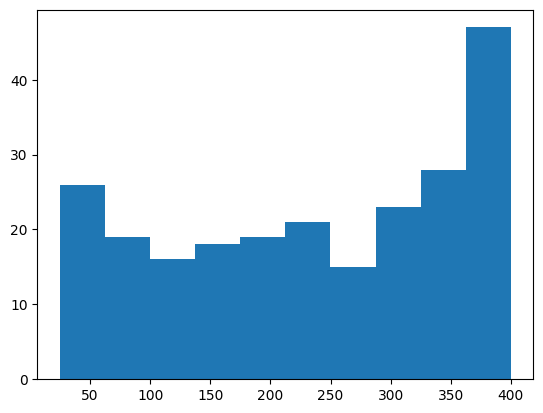

In [80]:
plt.hist(defense['toughest_min'])

In [81]:
#ranking within forwards toughest min
def calculate_percentile_rank(f_rank):
    
    percentile_rank = stats.percentileofscore(forward["toughest_min"], f_rank)
    return percentile_rank

f_rank =  1447.75 # Replace with the player's actual time on ice

percentile_rank = calculate_percentile_rank(f_rank)
print(f"The player's percentile rank among all players is: {percentile_rank}")

The player's percentile rank among all players is: 100.0


In [82]:
#Defensive Players
d_men = player_usage.query('Skater == "D"')
d_men = d_men[['Player', 'Team', 'QoCD','QoTD']]
d_men

,Player,Team,QoCD,QoTD
0,John Carlson,WSH,100.00,100.00
1,Drew Doughty,L.A,99.56,100.00
2,Mike Matheson,MTL,99.11,100.00
3,Rasmus Dahlin,BUF,98.67,100.00
4,Brock Faber,MIN,98.23,100.00
...,...,...,...,...
609,Zac Jones,NYR,3.56,12.50
612,Josh Mahura,FLA,0.00,12.50
613,Nick DeSimone,CGY,1.76,9.09
617,Jacob MacDonald,S.J,1.33,11.11


In [83]:
#Young forwards
forwards = player_usage.query('Skater == "F"')
young_forwards = forwards.query('Age <=25')
young_forwards = young_forwards[['Player', 'Team', 'Position', 'GP', 'Age', 'TOI', 'QoCF', 'QoTF', 'toughest_min']]
young_forwards['young_percentile'] = round((young_forwards['TOI'].rank(pct=True))*100, 2)



In [84]:
result = d_men[d_men['QoCD']  < d_men['QoTD']]
result['diff'] = result['QoCD']-result['QoTD']
result.query('diff <= -25').sort_values(['diff'], ascending=[True])

C:\Users\kjcs2\AppData\Local\Temp\ipykernel_56596\3699903389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['diff'] = result['QoCD']-result['QoTD']


,Player,Team,QoCD,QoTD,diff
364,Connor Murphy,CHI,25.11,66.67,-41.56
441,Brayden Pachal,CGY,17.18,54.55,-37.37
418,Jarred Tinordi,CHI,21.52,55.56,-34.04
149,Kyle Burroughs,S.J,56.44,88.89,-32.45
249,David Savard,MTL,43.30,75.00,-31.70
155,Jackson LaCombe,ANA,56.39,87.50,-31.11
358,Johnathan Kovacevic,MTL,31.70,62.50,-30.80
443,Pierre-Olivier Joseph,PIT,20.89,50.00,-29.11
302,Matt Grzelcyk,BOS,37.95,66.67,-28.72
467,Parker Wotherspoon,BOS,16.96,44.44,-27.48


In [85]:
#seesaw
seesaw = d_men.query('Player == "Nick Jensen" or Player == "Justin Holl" or Player == "David Savard"')
seesaw = seesaw[['Player','Team', 'QoCD', 'QoTD']]
seesaw

,Player,Team,QoCD,QoTD
78,Nick Jensen,WSH,69.03,85.71
249,David Savard,MTL,43.30,75.00
569,Justin Holl,DET,8.89,14.29


In [86]:
young_forwards.query('Player == "Alex DeBrincat"')

,Player,Team,Position,GP,Age,TOI,QoCF,QoTF,toughest_min,young_percentile


In [87]:
young_forwards['toughest_min'].mean()

158.90166666666673

In [88]:
forwards.query('Player == "Alex DeBrincat"')
pd.set_option('display.max_colwidth', None)


In [89]:
forwards.query('Player == "Alex DeBrincat"').describe()

,player_id,GP,TOI,Age,atoi,total_percentile,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,toughest_min
count,1.0,1.0,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,1.00,1.0,1.0,1.00
mean,8479337.0,82.0,1467.15,26.0,17.89,77.32,82.0,1467.15,17.89,1466.98,92.86,57.14,NaN,NaN,NaN,85.19,64.0,1.0,299.19
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8479337.0,82.0,1467.15,26.0,17.89,77.32,82.0,1467.15,17.89,1466.98,92.86,57.14,NaN,NaN,NaN,85.19,64.0,1.0,299.19
25%,8479337.0,82.0,1467.15,26.0,17.89,77.32,82.0,1467.15,17.89,1466.98,92.86,57.14,NaN,NaN,NaN,85.19,64.0,1.0,299.19
50%,8479337.0,82.0,1467.15,26.0,17.89,77.32,82.0,1467.15,17.89,1466.98,92.86,57.14,NaN,NaN,NaN,85.19,64.0,1.0,299.19
75%,8479337.0,82.0,1467.15,26.0,17.89,77.32,82.0,1467.15,17.89,1466.98,92.86,57.14,NaN,NaN,NaN,85.19,64.0,1.0,299.19
max,8479337.0,82.0,1467.15,26.0,17.89,77.32,82.0,1467.15,17.89,1466.98,92.86,57.14,NaN,NaN,NaN,85.19,64.0,1.0,299.19


Bruins Free Agents:

1. Jesper Boqvist (RFA)
2. Jake DeBrusk (UFA)
3. Danton Heinen (UFA)
4. Pat Maroon (UFA)
5. JVR (UFA)
6. Matt Grzelcyk (UFA)
7. Derek Forbort (UFA)
8. Kevin Shattenkirk (UFA)

In [90]:
boston_roster = player_usage.query('Team == "BOS"')
boston_roster

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
18,Charlie McAvoy,8479325,BOS,D,74,1838.60,26,24.85,96.04,D,74.0,1838.60,24.85,1838.90,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,99.76,88.84,1,BOS,388.60
46,Hampus Lindholm,8476854,BOS,D,73,1699.92,30,23.29,92.09,D,73.0,1699.92,23.29,1700.17,100.00,88.89,NaN,NaN,NaN,NaN,NaN,NaN,98.54,79.91,1,BOS,367.34
71,David Pastrnak,8477956,BOS,R,82,1634.23,28,19.93,89.35,F,82.0,1634.23,19.93,1634.26,100.00,77.78,NaN,NaN,NaN,NaN,NaN,NaN,97.08,75.00,1,BOS,349.86
97,Brad Marchand,8473419,BOS,L,82,1566.35,36,19.10,85.08,F,82.0,1566.35,19.10,1566.20,93.33,77.78,NaN,NaN,NaN,NaN,NaN,NaN,92.70,70.98,1,BOS,334.79
117,Brandon Carlo,8478443,BOS,D,76,1512.65,27,19.90,82.04,D,76.0,1512.65,19.90,1512.40,86.67,77.78,NaN,NaN,NaN,NaN,NaN,NaN,90.02,66.96,1,BOS,321.43
148,Charlie Coyle,8475745,BOS,C,82,1481.45,32,18.07,79.00,F,82.0,1481.45,18.07,1481.74,86.67,66.67,NaN,NaN,NaN,NaN,NaN,NaN,86.62,65.62,1,BOS,305.58
181,Pavel Zacha,8478401,BOS,C,78,1412.27,27,18.11,72.45,F,78.0,1412.27,18.11,1412.58,80.00,66.67,NaN,NaN,NaN,NaN,NaN,NaN,81.02,57.59,1,BOS,285.28
206,Jake DeBrusk,8478498,BOS,L,80,1346.58,27,16.83,67.73,F,80.0,1346.58,16.83,1346.40,73.33,66.67,NaN,NaN,NaN,NaN,NaN,NaN,75.91,53.12,1,BOS,269.03
266,Morgan Geekie,8479987,BOS,C,76,1171.08,25,15.41,52.51,F,76.0,1171.08,15.41,1171.16,66.67,66.67,NaN,NaN,NaN,NaN,NaN,NaN,58.88,39.73,1,BOS,231.95
291,Trent Frederic,8479365,BOS,C,82,1127.98,26,13.76,49.16,F,82.0,1127.98,13.76,1128.32,60.00,66.67,NaN,NaN,NaN,NaN,NaN,NaN,55.47,37.95,1,BOS,220.09


In [91]:
free_agents = boston_roster.query('Player == "Jesper Boqvist"or Player == "Jake DeBrusk" or Player == "Danton Heinen" or Player == "Matt Grzelcyk"')
free_agents

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
206,Jake DeBrusk,8478498,BOS,L,80,1346.58,27,16.83,67.73,F,80.0,1346.58,16.83,1346.40,73.33,66.67,NaN,NaN,NaN,NaN,NaN,NaN,75.91,53.12,1,BOS,269.03
302,Matt Grzelcyk,8476891,BOS,D,63,1108.65,30,17.60,47.95,D,63.0,1108.65,17.60,1108.80,53.33,66.67,NaN,NaN,NaN,NaN,NaN,NaN,53.28,37.95,1,BOS,211.23
337,Danton Heinen,8478046,BOS,L,74,1070.43,28,14.47,44.90,F,74.0,1070.43,14.47,1070.78,53.33,55.56,NaN,NaN,NaN,NaN,NaN,NaN,50.85,35.27,1,BOS,195.01
600,Jesper Boqvist,8480003,BOS,C,47,524.05,25,11.15,8.98,F,47.0,524.05,11.15,524.05,20.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,10.71,5.36,1,BOS,36.07


In [92]:
free_agents

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
206,Jake DeBrusk,8478498,BOS,L,80,1346.58,27,16.83,67.73,F,80.0,1346.58,16.83,1346.40,73.33,66.67,NaN,NaN,NaN,NaN,NaN,NaN,75.91,53.12,1,BOS,269.03
302,Matt Grzelcyk,8476891,BOS,D,63,1108.65,30,17.60,47.95,D,63.0,1108.65,17.60,1108.80,53.33,66.67,NaN,NaN,NaN,NaN,NaN,NaN,53.28,37.95,1,BOS,211.23
337,Danton Heinen,8478046,BOS,L,74,1070.43,28,14.47,44.90,F,74.0,1070.43,14.47,1070.78,53.33,55.56,NaN,NaN,NaN,NaN,NaN,NaN,50.85,35.27,1,BOS,195.01
600,Jesper Boqvist,8480003,BOS,C,47,524.05,25,11.15,8.98,F,47.0,524.05,11.15,524.05,20.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,10.71,5.36,1,BOS,36.07


In [93]:
#create a data set of other stats
performance = all_players
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            710 non-null    object 
 1   player_id         710 non-null    int64  
 2   Team              710 non-null    object 
 3   Position          710 non-null    object 
 4   GP                710 non-null    int64  
 5   TOI               710 non-null    float64
 6   Age               710 non-null    int64  
 7   atoi              710 non-null    float64
 8   total_percentile  710 non-null    float64
 9   Skater            710 non-null    object 
 10  team_gp           710 non-null    float64
 11  team_TOI          710 non-null    float64
 12  team_atoi         710 non-null    float64
 13  adj_toi           710 non-null    float64
 14  QoTF              710 non-null    float64
 15  QoTD              710 non-null    float64
 16  Team 1            105 non-null    object 
 1

In [94]:
# performance= performance[['Player', 'Position','Goals',
#        'Total Assists', 'First Assists', 'Second Assists', 'Total Points',
#        'IPP', 'Shots', 'SH%', 'ixG', 'iCF', 'iFF', 'iSCF', 'iHDCF',
#        'Rush Attempts', 'Rebounds Created', 'PIM', 'Total Penalties', 'Minor',
#        'Major', 'Misconduct', 'Penalties Drawn', 'Giveaways', 'Takeaways',
#        'Hits', 'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost',
#        'Faceoffs %']]
# performance.head()

performance = performance.merge(all_toi, on= ('Player', 'Position'), how = 'left' )
performance.head()

,Player,player_id_x,Team_x,Position,GP_x,TOI_x,Age_x,atoi_x,total_percentile_x,Skater_x,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,player_id_y,Team_y,GP_y,TOI_y,Age_y,atoi_y,total_percentile_y,Skater_y
0,Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,0.797565,F,80.0,1491.20,18.64,1491.20,93.333333,62.500000,NaN,NaN,NaN,NaN,NaN,NaN,87.135922,66.222222,1,FLA,8479314,FLA,80,1491.20,26,18.64,0.797565,F
1,Zach Hyman,8475786,EDM,L,80,1560.03,32,19.50,0.849315,F,80.0,1560.03,19.50,1560.00,80.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,92.978208,72.123894,1,EDM,8475786,EDM,80,1560.03,32,19.50,0.849315,F
2,Carter Verhaeghe,8477409,FLA,C,76,1365.15,28,17.96,0.692542,F,76.0,1365.15,17.96,1364.96,80.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,77.184466,56.000000,1,FLA,8477409,FLA,76,1365.15,28,17.96,0.692542,F
3,Stefan Noesen,8476474,CAR,R,81,960.92,31,11.86,0.366819,F,81.0,960.92,11.86,960.66,35.714286,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,41.404358,29.777778,1,CAR,8476474,CAR,81,960.92,31,11.86,0.366819,F
4,Evan Bouchard,8480803,EDM,D,81,1862.77,24,23.00,0.968037,D,81.0,1862.77,23.00,1863.00,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.757869,91.150442,1,EDM,8480803,EDM,81,1862.77,24,23.00,0.968037,D


In [95]:
young_free_agents = free_agents[['QoCF', 'QoCD', 'QoTF', 'QoTD']]
young_free_agents

,QoCF,QoCD,QoTF,QoTD
206,75.91,53.12,73.33,66.67
302,53.28,37.95,53.33,66.67
337,50.85,35.27,53.33,55.56
600,10.71,5.36,20.00,0.00


In [96]:

boston_roster['QoCF'] = pd.to_numeric(boston_roster['QoCF'])  # Convert 'QoCF' column to numeric type
boston_roster.set_index('Player', inplace=True)
boston_roster = boston_roster.sort_values(['QoCF', 'TOI'], ascending=[False, False])
boston_roster

C:\Users\kjcs2\AppData\Local\Temp\ipykernel_56596\4287085920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_roster['QoCF'] = pd.to_numeric(boston_roster['QoCF'])  # Convert 'QoCF' column to numeric type


,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
Player,,,,,,,,,,,,,,,,,,,,,,,,,,
Charlie McAvoy,8479325,BOS,D,74,1838.60,26,24.85,96.04,D,74.0,1838.60,24.85,1838.90,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,99.76,88.84,1,BOS,388.60
Hampus Lindholm,8476854,BOS,D,73,1699.92,30,23.29,92.09,D,73.0,1699.92,23.29,1700.17,100.00,88.89,NaN,NaN,NaN,NaN,NaN,NaN,98.54,79.91,1,BOS,367.34
David Pastrnak,8477956,BOS,R,82,1634.23,28,19.93,89.35,F,82.0,1634.23,19.93,1634.26,100.00,77.78,NaN,NaN,NaN,NaN,NaN,NaN,97.08,75.00,1,BOS,349.86
Brad Marchand,8473419,BOS,L,82,1566.35,36,19.10,85.08,F,82.0,1566.35,19.10,1566.20,93.33,77.78,NaN,NaN,NaN,NaN,NaN,NaN,92.70,70.98,1,BOS,334.79
Brandon Carlo,8478443,BOS,D,76,1512.65,27,19.90,82.04,D,76.0,1512.65,19.90,1512.40,86.67,77.78,NaN,NaN,NaN,NaN,NaN,NaN,90.02,66.96,1,BOS,321.43
Charlie Coyle,8475745,BOS,C,82,1481.45,32,18.07,79.00,F,82.0,1481.45,18.07,1481.74,86.67,66.67,NaN,NaN,NaN,NaN,NaN,NaN,86.62,65.62,1,BOS,305.58
Pavel Zacha,8478401,BOS,C,78,1412.27,27,18.11,72.45,F,78.0,1412.27,18.11,1412.58,80.00,66.67,NaN,NaN,NaN,NaN,NaN,NaN,81.02,57.59,1,BOS,285.28
Jake DeBrusk,8478498,BOS,L,80,1346.58,27,16.83,67.73,F,80.0,1346.58,16.83,1346.40,73.33,66.67,NaN,NaN,NaN,NaN,NaN,NaN,75.91,53.12,1,BOS,269.03
Morgan Geekie,8479987,BOS,C,76,1171.08,25,15.41,52.51,F,76.0,1171.08,15.41,1171.16,66.67,66.67,NaN,NaN,NaN,NaN,NaN,NaN,58.88,39.73,1,BOS,231.95


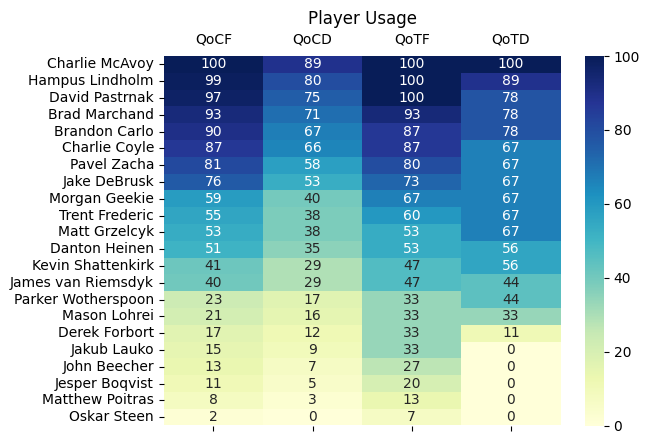

In [97]:
# Create the heatmap table
boston_map = boston_roster[['QoCF', 'QoCD', 'QoTF', 'QoTD']]
sb.heatmap(boston_map, annot=True, cmap='YlGnBu', fmt='.0f', cbar=True)
plt.tick_params(axis='x', labelrotation=0, labeltop=True, labelbottom=False)
plt.tick_params(axis='y', labelrotation=360)
# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Player Usage')

# Display the plot
plt.show()

In [98]:
boston = boston_roster
boston['QoCF'] = pd.to_numeric(boston['QoCF'])  # Convert 'QoCF' column to numeric type
# boston.set_index('Player', inplace=True)
boston = boston.sort_values(['QoCF', 'TOI'], ascending=[False, False])
boston

,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
Player,,,,,,,,,,,,,,,,,,,,,,,,,,
Charlie McAvoy,8479325,BOS,D,74,1838.60,26,24.85,96.04,D,74.0,1838.60,24.85,1838.90,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,99.76,88.84,1,BOS,388.60
Hampus Lindholm,8476854,BOS,D,73,1699.92,30,23.29,92.09,D,73.0,1699.92,23.29,1700.17,100.00,88.89,NaN,NaN,NaN,NaN,NaN,NaN,98.54,79.91,1,BOS,367.34
David Pastrnak,8477956,BOS,R,82,1634.23,28,19.93,89.35,F,82.0,1634.23,19.93,1634.26,100.00,77.78,NaN,NaN,NaN,NaN,NaN,NaN,97.08,75.00,1,BOS,349.86
Brad Marchand,8473419,BOS,L,82,1566.35,36,19.10,85.08,F,82.0,1566.35,19.10,1566.20,93.33,77.78,NaN,NaN,NaN,NaN,NaN,NaN,92.70,70.98,1,BOS,334.79
Brandon Carlo,8478443,BOS,D,76,1512.65,27,19.90,82.04,D,76.0,1512.65,19.90,1512.40,86.67,77.78,NaN,NaN,NaN,NaN,NaN,NaN,90.02,66.96,1,BOS,321.43
Charlie Coyle,8475745,BOS,C,82,1481.45,32,18.07,79.00,F,82.0,1481.45,18.07,1481.74,86.67,66.67,NaN,NaN,NaN,NaN,NaN,NaN,86.62,65.62,1,BOS,305.58
Pavel Zacha,8478401,BOS,C,78,1412.27,27,18.11,72.45,F,78.0,1412.27,18.11,1412.58,80.00,66.67,NaN,NaN,NaN,NaN,NaN,NaN,81.02,57.59,1,BOS,285.28
Jake DeBrusk,8478498,BOS,L,80,1346.58,27,16.83,67.73,F,80.0,1346.58,16.83,1346.40,73.33,66.67,NaN,NaN,NaN,NaN,NaN,NaN,75.91,53.12,1,BOS,269.03
Morgan Geekie,8479987,BOS,C,76,1171.08,25,15.41,52.51,F,76.0,1171.08,15.41,1171.16,66.67,66.67,NaN,NaN,NaN,NaN,NaN,NaN,58.88,39.73,1,BOS,231.95


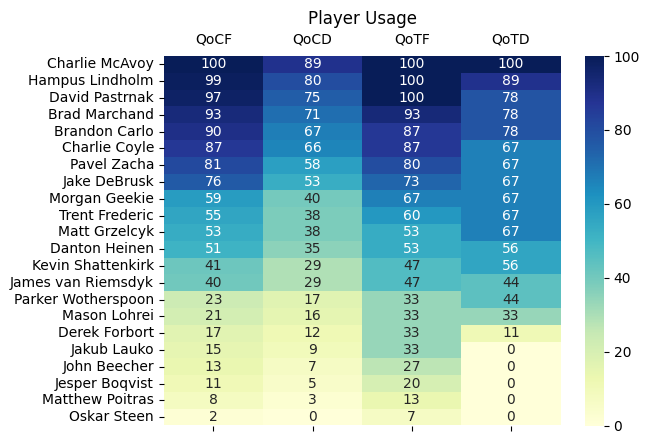

In [99]:


# Create the heatmap table
boston = boston[['QoCF', 'QoCD', 'QoTF', 'QoTD']]
sb.heatmap(boston, annot=True, cmap='YlGnBu', fmt='.0f', cbar=True)
plt.tick_params(axis='x', labelrotation=0, labeltop=True, labelbottom=False)
plt.tick_params(axis='y', labelrotation=360)
# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Player Usage')

# Display the plot
plt.show()

In [100]:
boston_roster_1=boston_roster[[ 'toughest_min']]
boston_roster_1

,toughest_min
Player,
Charlie McAvoy,388.60
Hampus Lindholm,367.34
David Pastrnak,349.86
Brad Marchand,334.79
Brandon Carlo,321.43
Charlie Coyle,305.58
Pavel Zacha,285.28
Jake DeBrusk,269.03
Morgan Geekie,231.95


In [101]:
#forwards who are of similar age to JD - 
 
young_forwards

,Player,Team,Position,GP,Age,TOI,QoCF,QoTF,toughest_min,young_percentile
44,Nick Suzuki,MTL,C,82,24,1743.65,99.03,100.00,370.46,100.00
64,Jesper Bratt,N.J,L,82,25,1581.57,93.93,100.00,353.55,96.83
67,Robert Thomas,STL,C,82,24,1719.25,98.79,100.00,352.89,99.21
69,Fabian Zetterlund,S.J,L,82,24,1546.20,91.53,100.00,350.20,94.44
74,Cole Caufield,MTL,R,82,23,1592.48,94.67,92.31,347.69,97.62
...,...,...,...,...,...,...,...,...,...,...
632,Nils Aman,VAN,C,43,24,444.37,7.99,6.67,17.31,8.73
643,Jaret Anderson-Dolan,L.A,C,31,24,342.55,3.39,8.33,11.72,3.17
645,Kyle MacLean,NYI,C,32,25,322.77,2.19,7.14,9.33,2.38
651,Jonah Gadjovich,FLA,L,39,25,289.82,1.46,6.67,8.13,1.59


In [102]:
#Players similar age to JD

jd_f = forward.query('Age >=26 and Age < 28 ')
jd_f['Player'].unique()

array(['Auston Matthews', 'Kirill Kaprizov', 'Mikko Rantanen',
       'Mathew Barzal', 'Joel Eriksson Ek', 'Connor McDavid',
       'Travis Konecny', 'Sebastian Aho', 'Dylan Strome', 'Brock Boeser',
       'Drake Batherson', 'Matthew Tkachuk', 'Troy Terry',
       'Anthony Cirelli', 'Alex DeBrincat', 'Jordan Kyrou',
       'Yegor Sharangovich', 'Pavel Zacha', 'Kevin Fiala',
       'Lawson Crouse', 'Jake DeBrusk', 'Dylan Larkin', 'Adrian Kempe',
       'Jack Eichel', 'Roope Hintz', 'Luke Kunin', 'Taylor Raddysh',
       'Tage Thompson', "Drew O'Connor", 'Timo Meier', 'Kyle Connor',
       'Trent Frederic', 'Mathieu Joseph', 'Yakov Trenin', 'Nicolas Roy',
       'Jordan Greenway', 'Beck Malenstyn', 'Sam Bennett', 'Tommy Novak',
       'Kasperi Kapanen', 'Ross Colton', 'Jack Roslovic',
       'Anthony Beauvillier', 'Michael Eyssimont', 'Sam Steel',
       'Kevin Stenlund', 'Brandon Duhaime', 'Brett Howden',
       'Daniel Sprong', 'Christian Fischer', 'Keegan Kolesar',
       "Logan O'Con

In [103]:
jd_f = jd_f.query('Position == "L" or Position == "R"')
jd_f = jd_f.query('team_count != "Multi"')



In [104]:


jd_f['QoCF'] = pd.to_numeric(jd_f['QoCF'])  # Convert 'QoCF' column to numeric type
jd_f.set_index('Player', inplace=True)
jd_f = jd_f.sort_values(['QoCF', 'TOI'], ascending=[False, False])
jd_f

,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
Player,,,,,,,,,,,,,,,,,,,,,,,,,,
Mikko Rantanen,8478420,COL,R,80,1832.45,27,22.91,95.28,F,80.0,1832.45,22.91,1832.80,94.12,71.43,NaN,NaN,NaN,NaN,NaN,NaN,100.00,87.67,1,COL,353.22
Kirill Kaprizov,8478864,MIN,L,75,1616.17,27,21.55,88.43,F,75.0,1616.17,21.55,1616.25,100.00,88.89,NaN,NaN,NaN,NaN,NaN,NaN,95.89,74.34,1,MIN,359.12
Brock Boeser,8478444,VAN,R,81,1506.78,27,18.60,81.28,F,81.0,1506.78,18.60,1506.60,86.67,71.43,NaN,NaN,NaN,NaN,NaN,NaN,89.35,65.93,1,VAN,313.38
Travis Konecny,8478439,PHI,R,76,1508.02,27,19.84,81.58,F,76.0,1508.02,19.84,1507.84,100.00,66.67,NaN,NaN,NaN,NaN,NaN,NaN,89.32,66.37,1,PHI,322.36
Drake Batherson,8480208,OTT,R,82,1490.27,26,18.17,79.45,F,82.0,1490.27,18.17,1489.94,85.71,71.43,NaN,NaN,NaN,NaN,NaN,NaN,87.17,65.33,1,OTT,309.64
Matthew Tkachuk,8479314,FLA,L,80,1491.20,26,18.64,79.76,F,80.0,1491.20,18.64,1491.20,93.33,62.50,NaN,NaN,NaN,NaN,NaN,NaN,87.14,66.22,1,FLA,309.19
Kevin Fiala,8477942,L.A,L,82,1478.92,27,18.04,78.84,F,82.0,1478.92,18.04,1479.28,91.67,33.33,NaN,NaN,NaN,NaN,NaN,NaN,86.23,66.37,1,L.A,277.60
Alex DeBrincat,8479337,DET,R,82,1467.15,26,17.89,77.32,F,82.0,1467.15,17.89,1466.98,92.86,57.14,NaN,NaN,NaN,NaN,NaN,NaN,85.19,64.00,1,DET,299.19
Adrian Kempe,8477960,L.A,R,77,1457.92,27,18.93,76.26,F,77.0,1457.92,18.93,1457.61,75.00,33.33,NaN,NaN,NaN,NaN,NaN,NaN,84.54,62.39,1,L.A,255.26


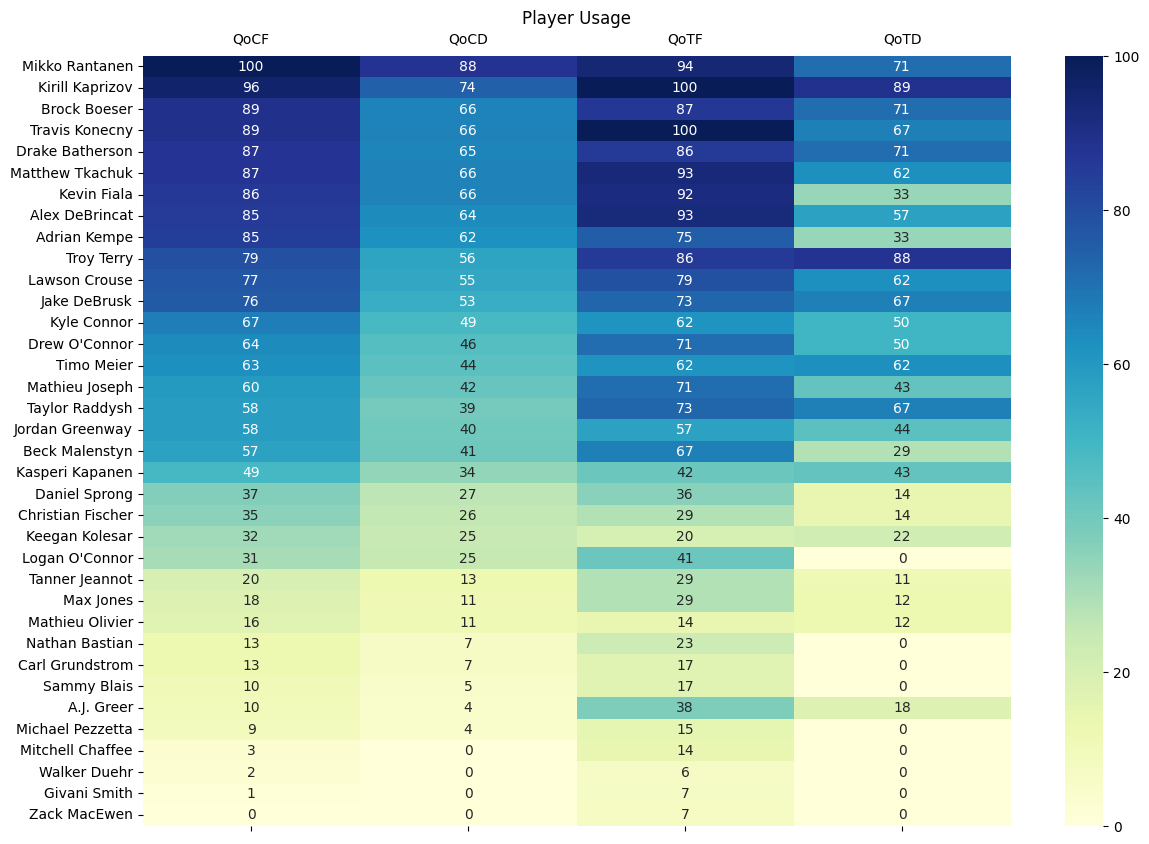

In [105]:
# Create the heatmap table
jd_f = jd_f[['QoCF', 'QoCD', 'QoTF', 'QoTD']]

plt.figure(figsize=(14, 10)) 

sb.heatmap(jd_f, annot=True, cmap='YlGnBu', fmt='.0f', cbar=True)
plt.tick_params(axis='x', labelrotation=0, labeltop=True, labelbottom=False)
plt.tick_params(axis='y', labelrotation=360)
# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Player Usage')

# Display the plot
plt.show()

In [106]:
# atlantic = forwards.query('Team == "BOS" or Team == "TOR" or Team == "OTT" or Team == "MTL" or Team == "DET" or Team == "BUF" or Team == "TBL" or Team == "FLA"')
# atlantic
new_players = player_usage.query('Player == "Elias Lindholm"or Player == "Nikita Zadorov" or Player == "Max Jones"')
new_players

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min
105,Elias Lindholm,8477496,CGY,C,75,1477.02,29,19.69,78.69,F,49.0,1016.68,20.75,1556.25,93.75,72.73,CGY,VAN,0,1556.25,1328.25,0.0,92.21,71.49,1,Multi,330.18
267,Nikita Zadorov,8477507,VAN,D,75,1308.07,29,17.44,64.23,D,54.0,921.60,17.07,1280.25,73.33,42.86,VAN,CGY,0,1280.25,1380.00,0.0,66.34,48.89,1,Multi,231.42
542,Max Jones,8479368,ANA,L,52,626.82,26,12.05,15.83,F,52.0,626.82,12.05,626.60,28.57,12.50,NaN,NaN,NaN,NaN,NaN,NaN,17.68,11.45,1,ANA,70.20


In [107]:
# atlantic_tm=atlantic
# atlantic_tm['tm_percentile'] = round(((atlantic['toughest_min'].rank(pct=True))*100),2)
# atlantic_tm=atlantic_tm.sort_values(by=['tm_percentile'], ascending=[False]).reset_index(drop=True)


# new_players['tm_percentile'] = round(((new_players['toughest_min'].rank(pct=True))*100),2)
# new_players=new_players.sort_values(by=['tm_percentile'], ascending=[False]).reset_index(drop=True)
all_players_1 = player_usage
all_players_1['tm_percentile'] = round(((all_players_1['toughest_min'].rank(pct=True))*100),2)
all_players_1=all_players_1.sort_values(by=['tm_percentile'], ascending=[False]).reset_index(drop=True)

In [108]:
all_players_1.head()

,Player,player_id,Team,Position,GP,TOI,Age,atoi,total_percentile,Skater,team_gp,team_TOI,team_atoi,adj_toi,QoTF,QoTD,Team 1,Team 2,Team 3,adj_toi 1,adj_toi 2,adj_toi 3,QoCF,QoCD,team_no,team_count,toughest_min,tm_percentile
0,John Carlson,8474590,WSH,D,82,2123.12,34,25.89,100.00,D,82.0,2123.12,25.89,2122.98,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.00,1,WSH,400.00,100.00
1,Drew Doughty,8474563,L.A,D,82,2115.07,34,25.79,99.85,D,82.0,2115.07,25.79,2114.78,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,99.56,1,L.A,399.56,99.85
2,Mike Matheson,8476875,MTL,D,82,2095.33,30,25.55,99.70,D,82.0,2095.33,25.55,2095.10,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,99.11,1,MTL,399.11,99.70
3,Rasmus Dahlin,8480839,BUF,D,81,2059.22,24,25.42,99.54,D,81.0,2059.22,25.42,2059.02,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,98.67,1,BUF,398.67,99.54
4,Brock Faber,8482122,MIN,D,82,2046.83,21,24.96,99.39,D,82.0,2046.83,24.96,2046.72,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,98.23,1,MIN,398.23,99.39


In [109]:
# atlantic_tm.query('Player == "Jake DeBrusk"')

In [110]:
# atlantic_tm=atlantic_tm[['Player', 'Team', 'Position', 'GP', 'TOI', 'Age', 'total_percentile', 'toughest_min', 'tm_percentile']]
# atlantic_tm = atlantic_tm.merge(player_stats, on = 'Player', how = "left")

# new_players=new_players[['Player', 'Team', 'Position', 'GP', 'TOI', 'Age', 'total_percentile', 'toughest_min', 'tm_percentile']]
# new_players = new_players.merge(player_stats, on = 'Player', how = "left")

all_players_1 = all_players_1[['Player', 'Team', 'Position', 'GP', 'TOI', 'Age', 'total_percentile', 'toughest_min', 'tm_percentile']]
all_players_1 = all_players_1.merge(player_stats, on = 'Player', how = "left")
all_players_1.head()

,Player,Team,Position_x,GP,TOI,Age,total_percentile,toughest_min,tm_percentile,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iHDCF,Rush Attempts,Rebounds Created,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,Position_y,CF,CA,GF,GA,GF%,xGF,xGA,HDGF%,PDO,player_id
0,John Carlson,WSH,D,82,2123.12,34,100.00,400.00,100.00,10,42,16,26,52,46.85,176,5.68,12.36,439,28,11,50,82,58,61,87,194,-,D,2182,2361,111,117,48.68,131.22,126.94,50.00,1.004,8474590
1,Drew Doughty,L.A,D,82,2115.07,34,99.85,399.56,99.85,15,35,14,21,50,43.86,135,11.11,8.30,306,12,7,27,45,20,104,122,142,-,D,2247,1863,114,71,61.62,118.76,99.71,57.65,1.024,8474563
2,Mike Matheson,MTL,D,82,2095.33,30,99.70,399.11,99.70,11,51,24,27,62,57.94,187,5.88,10.10,403,23,6,30,76,49,47,113,186,-,D,1924,2393,107,131,44.96,108.85,134.15,47.17,0.993,8476875
3,Rasmus Dahlin,BUF,D,81,2059.22,24,99.54,398.67,99.54,20,39,24,15,59,53.15,235,8.51,14.63,474,21,11,38,44,42,174,157,154,-,D,2450,1795,111,96,53.62,125.63,104.05,47.78,0.978,8480839
4,Brock Faber,MIN,D,82,2046.83,21,99.39,398.23,99.39,8,39,18,21,47,42.34,136,5.88,7.44,293,15,3,24,35,15,59,122,150,-,D,1979,2169,111,118,48.47,104.82,107.61,49.12,1.002,8482122


In [111]:
# # atlantic_tm.head(26).sort_values(by=['Rush Attempts'], ascending=[False]).reset_index(drop=True)

# new_players.head(26).sort_values(by=['Rush Attempts'], ascending=[False]).reset_index(drop=True)


In [112]:
# atlantic_tm.iloc[25:41].sort_values(by=['HDGF%'], ascending=[False]).reset_index(drop=True)


In [113]:
# #reltationship between tough min and goals scored?
# atlantic_1 = atlantic_tm[['Player','toughest_min', 'Position', 'Goals', 'IPP', 'Total Points', 'SH%']]
# atlantic_1=atlantic_1.rename(columns={'Total Points': 'Total_Points', 'SH%': 'SH_pct'})
# atlantic_1.head()

#reltationship between tough min and goals scored?
all_players_1 = all_players_1[['Player','player_id','toughest_min', 'Position', 'Goals', 'IPP', 'Total Points', 'SH%']]
all_players_1=all_players_1.rename(columns={'Total Points': 'Total_Points', 'SH%': 'SH_pct'})
all_players_1.info()

KeyError: "['Position'] not in index"

In [ ]:
column_name = 'toughest_min'

# Calculate the mean of the specified column
column_median = all_players_1[column_name].median()

# Replace NaN values in the specified column with the column mean
all_players_1[column_name].fillna(column_median, inplace=True)

In [ ]:
# atlantic_1['intercept']=1
# lm=sm.OLS(atlantic_1['Goals'], atlantic_1[['intercept', 'toughest_min']])
# results = lm.fit()
# results.summary()

all_players_1['intercept']=1
lm=sm.OLS(all_players_1['Goals'], all_players_1[['intercept', 'toughest_min']])
results = lm.fit()
results.summary()


In [ ]:
# formula = 'Goals ~ toughest_min + Position + Total_Points'
# model = smf.ols(formula=formula, data=atlantic_1).fit()
# print(model.summary())

formula = 'Goals ~ toughest_min + Position + Total_Points'
model = smf.ols(formula=formula, data=all_players_1).fit()
print(model.summary())

In [ ]:
# Define the coefficients
Intercept =1.9571
Coeff_Position_C_L = 1.4745      
Coeff_Position_C_R = 3.1999            
Coeff_Position_D = -4.7563      
Coeff_Position_D_L = -1.0834            
Coeff_Position_L = 0.9458      
Coeff_Position_R = 0.6528      
Coeff_toughest_min = -0.0045
Coeff_Total_Points = 0.3830

# Create dummy variables for Position column
position_dummies = pd.get_dummies(all_players_1['Position'], prefix='Position', drop_first=True)

# Concatenate the original DataFrame with the dummy variables
all_players_1 = pd.concat([all_players_1, position_dummies], axis=1)

all_players_1




# # Define the coefficients
# Intercept = 0.4824
# Coeff_Position_L = -0.4402
# Coeff_Position_R = -0.8225
# Coeff_toughest_min = -0.0040
# Coeff_Total_Points = 0.4434

# # Create dummy variables for Position column
# position_dummies = pd.get_dummies(atlantic_1['Position'], prefix='Position', drop_first=True)

# # Concatenate the original DataFrame with the dummy variables
# atlantic_1 = pd.concat([atlantic_1, position_dummies], axis=1)

# atlantic_1['Predicted_Goals'] = (
#     Intercept +
#     (Coeff_Position_L * atlantic_1['Position_L']) +
#     (Coeff_Position_R * atlantic_1['Position_R']) +
#     (Coeff_toughest_min * atlantic_1['toughest_min']) +
#     (Coeff_Total_Points * atlantic_1['Total_Points'])
# )

# atlantic_1


In [ ]:
all_players_1['Predicted_Goals'] = (
    Intercept +
    (Coeff_Position_C_L * all_players_1['Position_C, L']) +
    (Coeff_Position_C_R * all_players_1['Position_C, R']) +
    (Coeff_Position_D * all_players_1['Position_D']) +
    (Coeff_Position_D_L * all_players_1['Position_D, L']) +
    (Coeff_Position_L * all_players_1['Position_L']) +
    (Coeff_Position_R * all_players_1['Position_R']) +
    (Coeff_toughest_min * all_players_1['toughest_min']) +
    (Coeff_Total_Points * all_players_1['Total_Points']) 
    )

all_players_1['Predicted_Goals'] = round(all_players_1['Predicted_Goals'],2)
all_players_1

In [ ]:
new_players = all_players_1.query('Player == "Shayne Gostisbehere"or Player == "Chandler Stephenson" or Player == "Tyler Bertuzzi"')
new_players = new_players [['Player', 'toughest_min', 'Goals', 'IPP', 'Total_Points', 'SH_pct', 'Predicted_Goals']]
new_players

In [ ]:
all_players_1.columns

Index(['Player', 'Team', 'Position_x', 'GP', 'TOI', 'Age', 'total_percentile',
       'toughest_min', 'tm_percentile', 'Goals', 'Total Assists',
       'First Assists', 'Second Assists', 'Total Points', 'IPP', 'Shots',
       'SH%', 'ixG', 'iCF', 'iHDCF', 'Rush Attempts', 'Rebounds Created',
       'Giveaways', 'Takeaways', 'Hits', 'Hits Taken', 'Shots Blocked',
       'Faceoffs %', 'Position_y', 'CF', 'CA', 'GF', 'GA', 'GF%', 'xGF', 'xGA',
       'HDGF%', 'PDO', 'player_id'],
      dtype='object')

In [ ]:
# atlantic_1.query('Player == "Jake DeBrusk"')

all_players_2 = all_players_1[['player_id', 'toughest_min', 'tm_percentile', 'Goals', 'Total Points']]
all_players_2.head()

,player_id,toughest_min,tm_percentile,Goals,Total Points
0,8474590,400.00,100.00,10,52
1,8474563,399.56,99.85,15,50
2,8476875,399.11,99.70,11,62
3,8480839,398.67,99.54,20,59
4,8482122,398.23,99.39,8,47


In [ ]:
skaters_full = pd.read_csv("skaters.csv")
skaters_full.head()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8480950,2023,Ilya Lyubushkin,TOR,D,other,74,2881.0,56.0,5.08,...,18.00,21.61,195.0,191.0,0.11,0.02,3.0,1.0,3.0,1.0
1,8480950,2023,Ilya Lyubushkin,TOR,D,all,74,76034.0,1717.0,4.47,...,176.13,171.61,3226.0,3132.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8480950,2023,Ilya Lyubushkin,TOR,D,5on5,74,61758.0,1389.0,4.47,...,107.09,104.80,2302.0,2303.0,6.54,0.64,140.0,11.0,108.0,8.0
3,8480950,2023,Ilya Lyubushkin,TOR,D,4on5,74,11271.0,259.0,3.43,...,4.28,27.86,68.0,482.0,0.11,0.00,4.0,0.0,3.0,0.0
4,8480950,2023,Ilya Lyubushkin,TOR,D,5on4,74,124.0,13.0,3.45,...,6.03,1.37,106.0,19.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
skaters_full.query('name == "Elias Lindholm"')

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
3715,8477496,2023,Elias Lindholm,VAN,C,other,75,5171.0,79.0,35.98,...,10.46,13.17,90.0,107.0,0.00,0.06,0.0,2.0,0.0,1.0
3716,8477496,2023,Elias Lindholm,VAN,C,all,75,88621.0,1890.0,42.17,...,149.03,135.38,3126.0,2883.0,0.00,0.00,0.0,0.0,0.0,0.0
3717,8477496,2023,Elias Lindholm,VAN,C,5on5,75,61224.0,1399.0,42.17,...,114.18,100.31,2674.0,2404.0,2.12,1.75,40.0,42.0,35.0,33.0
3718,8477496,2023,Elias Lindholm,VAN,C,4on5,75,9839.0,241.0,42.26,...,3.23,14.65,61.0,298.0,0.21,0.00,6.0,0.0,6.0,0.0
3719,8477496,2023,Elias Lindholm,VAN,C,5on4,75,12387.0,171.0,41.93,...,16.93,2.92,263.0,38.0,0.00,0.43,0.0,4.0,0.0,4.0
